# 01 - Summarize sentence with Gemeni Pro

## Prerequisite

In [1]:
! pip install -q -U google-generativeai

In [2]:
! pip install gradio

In [ ]:
!sudo apt install tesseract-ocr
!sudo apt install tesseract-ocr-tha
!pip install pytesseract

In [42]:
!pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 43.1 MB/s eta 0:00:00


### Google AI Studio API
source: https://makersuite.google.com/app/apikey

In [3]:
import pathlib
import textwrap

import google.generativeai as genai

# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [4]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [5]:
for m in genai.list_models():
    if 'generateContent' in m.supported_generation_methods:
      print(m.name)

models/gemini-pro
models/gemini-pro-vision


### Explore Gemeni-Pro model

In [6]:
model = genai.GenerativeModel(model_name="gemini-pro")

In [7]:
print(genai.get_model('models/gemini-pro'),'\n')

Model(name='models/gemini-pro',
      base_model_id='',
      version='001',
      display_name='Gemini Pro',
      description='The best model for scaling across a wide range of tasks',
      input_token_limit=30720,
      output_token_limit=2048,
      supported_generation_methods=['generateContent', 'countTokens'],
      temperature=0.9,
      top_p=1.0,
      top_k=1) 



## Summarize News with Gemeni-Pro

#### Input News

In [8]:
news = """

กลายเป็นประเด็นร้อนข้ามปี สำหรับดราม่าของ “เบียร์ เดอะวอยซ์” นักร้องสาวจากรายการประกวดร้องเพลงชื่อดัง The Voice Thailand ที่กลายเป็นแฮชแท็กร้อนสะเทือนโซเชียลมีเดียไทย ทำเอาชาวเน็ตไม่ได้หลับไม่ได้นอน หลังเบียร์โดนกล่าวหาว่าแอบแซ่บแฟนหนุ่มของเพื่อนสนิท จนกลายเป็นประเด็นดราม่าใหญ่โต โต้ตอบกันไปมาอย่างดุเดือด จนถึงวันนี้ก็ยังไม่มีท่าทีว่าจะสงบลง

แล้วดราม่าร้อนข้ามปีของ “เบียร์ เดอะวอยซ์” มีที่มาที่ไปอย่างไร ตอนนี้ถึงไหนกันแล้ว Sanook สรุปดราม่า “เบียร์ เดอะวอยซ์” มาฝากทุกคน ไม่งั้นคุณจะไปคุยกับใครเขาไม่รู้เรื่อง!

เจ้าหญิง เจ้าชาย และหญิงขายถั่ว
จุดเริ่มต้นประเด็นดราม่า มาจากเพจเฟซบุ๊กหนึ่งได้โพสต์เรื่องราวที่เกิดขึ้นในปาร์ตี้คริสต์มาสที่ถูกจัดขึ้นในคอนโดหรูแห่งหนึ่ง มีตัวละครคือเจ้าหญิง เจ้าชาย และหญิงขายถั่ว โดยหลังปาร์ตี้ เจ้าหญิงได้ตื่นขึ้นมาเห็นเจ้าชายจูบกับหญิงขายถั่ว พอเห็นแบบนั้น เจ้าหญิงกับเจ้าชายก็จบความสัมพันธ์กันในคืนนั้น

โพสต์ดังกล่าวกลายเป็นประเด็นร้อนทันที ชาวเน็ตเข้ามาแสดงความคิดเห็นกันอย่างล้นหลามจนเกิดเป็น #เบียร์เดอะวอยซ์ จนติดเทรนด์บน X (เอ็กซ์)

“เบียร์ เดอะวอยซ์” ออกโรง
หลังจากนั้น “เบียร์ เดอะวอยซ์” หรือ “ภัสรนันท์ อัษฏมงคล” ก็ได้ออกมาโพสต์เฟซบุ๊กส่วนตัว ยืนยันว่าไม่มีอะไรเกิดขึ้นตามที่ข่าวออกไป 100% และในห้องมีกล้องวงจรปิด ทว่า ในระหว่างนั้นมีการปล่อย “แชท” บทสนทนาระหว่างเบียร์กับหญิงสาวคู่กรณี ซึ่งเบียร์ได้แสดงความเสียใจและให้กำลังใจหญิงสาวคนดังกล่าว

ต่อมา เบียร์ได้อัดคลิปโทรหาหญิงสาวคู่กรณี แต่อีกฝ่ายไม่รับสาย ก่อนจะเข้ามาคอมเมนต์ว่า “เบียร์ พี่ประชุมงานอยู่นะคะ” ซึ่งนักร้องสาวก็ได้คอมเมนต์ตอบกลับว่า “สะดวกคุยกี่โมงคะ เบียร์จะได้โทรไป” พร้อมถามอีกว่า “พี่กลัวอะไร?” พร้อมกันนั้น เบียร์ยังตั้งคำถามว่าเพจที่เอาเรื่องราวไปโพสต์ ได้อยู่ในเหตุการณ์หรือไม่ ขอให้แสดงตัวด้วย

ขณะที่ฝ่ายชาย ก็ได้ออกมาโพสต์ข้อความลงในอินสตาแกรมส่วนตัว ระบุว่า “เรื่องมันเริ่มจะบานปลายไปแล้ว ผมน่าจะต้องออกมาทำอะไรซักอย่าง โดยอยากจะพูดตรงนี้เลยนะครับ ว่าวันนั้นผมกับเบียร์ไม่ได้มีอะไรเกินเลยแน่นอน”

เจ้าหญิงเคลื่อนไหว
หลังจากเบียร์ได้อัดคลิปโทรหาหญิงสาวคู่กรณี ซึ่งคลิปดังกล่าวมีคนเข้ามาชมมากกว่า 1.4 ล้านครั้งภายใน 3 ชั่วโมง ฝ่ายหญิงคู่กรณีก็ได้ออกมาเคลื่อนไหว โดยเล่าถึงความสัมพันธ์ของเธอกับฝ่ายชายและเบียร์ รวมถึงเหตุการณ์ที่เกิดขึ้นในคืนนั้นด้วย ซึ่งเธอได้ปฏิเสธว่าข่าวไม่ได้มาจากเธอและไม่ทราบว่าหลุดจากใคร แต่เมื่อเบียร์ปฏิเสธ ก็ทำให้เธอโดนโจมตี เธอจึงต้องปล่อยแชตออกมาปกป้องตัวเอง

ทั้งนี้ ฝ่ายหญิงคู่กรณีได้ระบุอีกว่า “ภาพจากกล้องไม่ได้อยู่ที่เรา เราไม่มีสิทธิ์เข้าถึงภาพเหล่านั้น และค่อนข้างมั่นใจว่า ถ้ามีการโพสต์คลิปจากกล้อง ก็คงไม่ผิดจากที่เราพิมพ์ไว้”

ขณะที่เพจต้นเรื่องก็ได้ออกมายอมรับว่าได้รับข่าวผิดพลาด มีคนกลางพยายามยุยงให้ทะเลาะกัน ทางเพจจึงออกมาขอโทษ พร้อมระบุจะขอพักเพจเป็นเวลา 1 วัน

ปล่อยคลิปเสียง โต้ตอบกันไปมา
เรื่องราวดูเหมือนจะค่อยๆ ซาลงไป กระทั่งเพจต้นเรื่องออกมาเคลื่อนไหวอีกครั้ง ด้วยการโพสต์คลิปเสียงสนทนาของเบียร์และคู่กรณีทั้ง 2 คน หลังจากฝ่ายหญิงจับได้ว่าฝ่ายชายไปดูภาพยนตร์คอนเสิร์ตกับเบียร์ หลังจากเกิดเรื่องในคืนปาร์ตี้คริสต์มาส แม้เบียร์จะรับปากว่าจะไม่ไปดูภาพยนตร์คอนเสิร์ตกับฝ่ายชายอย่างแน่นอน เพื่อให้ฝ่ายหญิงและฝ่ายชายได้ปรับความเข้าใจกัน

นอกจากนี้ เพจดังกล่าวยังได้โพสต์ภาพคลิปวิดีโอจากกล้องวงจรปิด ระบุว่ากล้องเบียร์ไม่มาแต่กล้องโรสมาแล้ว จนกลายเป็นดราม่าร้อนกันอีกครั้ง และ #เบียร์เดอะวอยซ์ ก็พุ่งทะยานติดเทรนด์ใน X (เอ็กซ์) อีกครั้ง

ชาวเน็ตต่างเข้าไปแสดงความคิดเห็นต่อประเด็นนี้อย่างดุเดือด บางส่วนเข้าไปคอมเมนต์ในโซเชียลมีเดียของเบียร์ จนมีการโต้ตอบกันระหว่างเบียร์กับชาวเน็ตอย่างรุนแรง ทำให้ชาวเน็ตหลายคนยิ่งหัวร้อนและเข้ามาแสดงความคิดเห็นต่อประเด็นดราม่าดังกล่าวมากขึ้นไปอีก

“ต่อให้ไม่มีเบียร์ ผู้ชายเขาก็ไม่กลับไปเอา”
หลังเป็นประเด็นดราม่าร้อนในโซเชียลมาหลายวัน ล่าสุด (4 ม.ค. 2567) เบียร์ก็ได้ออกมาไลฟ์สดผ่านเฟซบุ๊ก เปิดใจเล่าเรื่องราวทั้งหมดที่เกิดขึ้นในคืนเกิดเหตุ ระบุว่ารู้สึกงงที่เรื่องนี้กลายเป็นวาระแห่งชาติ และยอมรับว่าฝ่ายชายเข้ามา “จูบ” เธอจริง แต่ไม่ได้มีอะไรเกินเลยไปกว่านั้น ขณะที่ฝ่ายหญิงคู่กรณีก็เดินออกมาเห็นพอดี เธอจึงขอโทษและสัญญาว่าจะถอยห่างจากความสัมพันธ์ของทั้งสองคน ทั้งนี้ เบียร์ได้ระบุถึงผู้เกี่ยวข้องกับดราม่าดังกล่าวทั้งหมด 3 คน คือฝ่ายชาย ฝ่ายหญิง และผู้จัดการส่วนตัว ในไลฟ์สดของเธอ

อย่างไรก็ตาม ไลฟ์สดของเบียร์ได้รับเสียงวิพากษ์วิจารณ์อย่างหนัก เนื่องจากสีหน้าท่าทางของเธอที่ไม่แสดงออกว่ารู้สึกผิดหรือยอมรับผิด ยิ่งไปกว่านั้น ยังฟาดแรงด้วยประโยค “ต่อให้ไม่มีเบียร์ ผู้ชายเขาก็ไม่กลับไปเอา” ซึ่งทำให้ชาวเน็ตหัวร้อนมากกว่าเดิม ทำให้เสียงวิพากษ์วิจารณ์ยิ่งทวีความรุนแรงมากขึ้น

เพจดังฟาดกลับ
หลังเบียร์ออกมาไลฟ์สด เพจดังคู่กรณีก็ออกโรงมาฟาดเบียร์ต่อทันที ด้วยการเปิดคลิปเสียงของเบียร์อีกครั้ง โดยรอบนี้เป็นคลิปเสียงที่เบียร์เป็นคนพูดว่าตัวเองรู้สึกมีความสุขที่ได้อยู่กับฝ่ายชาย เรียงทัวร์และเสียงวิพากษ์วิจารณ์มาลงที่ #เบียร์เดอะวอยซ์ หนักกว่าเดิม

เบียร์ทิ้งบอมบ์
ไลฟ์สดของเบียร์ในครั้งนี้ มีผู้เข้ามารับชมมากกว่า 3 แสนคน คนดังมากมายต่างเข้ามารับชมไลฟ์ดังกล่าว อาทิ หนุ่ม กรรชัย, สรยุทธิ์ สุทัศนะจินดา และ กัน จอม พลัง เป็นต้น

ทั้งนี้ เบียร์ยังได้ทิ้งบอมบ์ในไลฟ์ ด้วยการบอกว่า “มีคนดัง ดารา พิธีกรที่มีลูกมีเมีย DM (Direct Message) มาหาเบียร์ มากดหัวใจให้อีกด้วย” หลังจากนั้น เธอก็ได้โพสต์รูปภาพที่มีคน DM มาหาเธอ ระบุว่า “น่ารักมากค่ะ” จนกลายเป็นอีกประเด็นร้อน ที่ชาวเน็ตต่างก็คาดเดากันไปว่าคนดังคนดังกล่าวคือใคร

"""

In [9]:
# news = input()

#### Model

In [10]:
model = genai.GenerativeModel('gemini-pro')

#### Test

In [12]:
prompt = 'สรุปข่่าวนี้ให้หน่อย: '
full_prompt = prompt + news
response = model.generate_content([full_prompt])
print(response.text)

- นักร้อง "เบียร์ เดอะวอยซ์" ถูกกล่าวหาว่าแอบคบกับแฟนหนุ่มของเพื่อนสนิท จนกลายเป็นดราม่าใหญ่
- เบียร์ออกมายืนยันว่าไม่มีอะไรเกิดขึ้นตามที่ข่าวออกไป 100% แต่มีการปล่อยแชทที่แสดงว่าเบียร์ได้ให้กำลังใจหญิงสาวคู่กรณี
- ฝ่ายหญิงคู่กรณีออกมาเล่าความสัมพันธ์ของเธอกับฝ่ายชายและเบียร์ และปฏิเสธว่าข่าวไม่ได้มาจากเธอ 
- เพจต้นเรื่องโพสต์คลิปเสียงสนทนาของเบียร์และคู่กรณีทั้ง 2 คน และโพสต์ภาพคลิปวิดีโอจากกล้องวงจรปิดที่จับภาพเบียร์และฝ่ายชายไปดูภาพยนตร์คอนเสิร์ตด้วยกัน
- เบียร์ออกมาไลฟ์สดเปิดใจเล่าเรื่องราวที่เกิดขึ้น ระบุว่ารู้สึกงงที่เรื่องนี้กลายเป็นวาระแห่งชาติ และยอมรับว่าฝ่ายชายจูบเธอจริง แต่ไม่ได้มีอะไรเกินเลยไปกว่านั้น
- ไลฟ์สดของเบียร์ได้รับเสียงวิพากษ์วิจารณ์อย่างหนัก เนื่องจากสีหน้าท่าทางของเธอที่ไม่แสดงออกว่ารู้สึกผิดหรือยอมรับผิด รวมถึงประโยคที่ว่า "ต่อให้ไม่มีเบียร์ ผู้ชายเขาก็ไม่กลับไปเอา"
- เพจดังคู่กรณีออกมาฟาดเบียร์ต่อทันที ด้วยการเปิดคลิปเสียงของเบียร์อีกครั้ง
- เบียร์ทิ้งบอมบ์ในไลฟ์ด้วยการบอกว่า "มีคนดัง ดารา พิธีกรที่มีลูกมีเมีย DM (Direct Message) มาหาเบียร์ มากดหัวใจให้อีกด้ว

## Summarize News from Image with Gemeni-Pro Vision

#### Input Image News

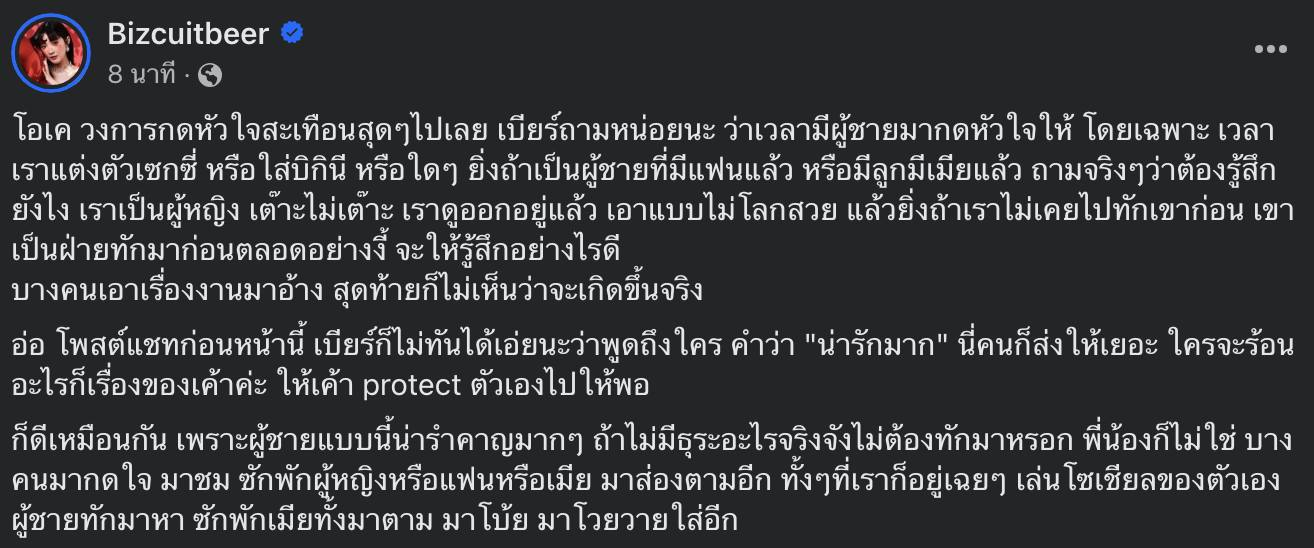

In [16]:
import PIL.Image

img = PIL.Image.open('/content/news.jpeg')
img

#### ThaiOCR with PyTesseract

In [34]:
import pytesseract
from PIL import Image

def thai_ocr(image_path):
    pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')
    custom_config = r'--oem 3 --psm 6 -l tha'

    img = Image.open(image_path)

    text = pytesseract.image_to_string(img, config=custom_config)
    return text

In [33]:
thai_text = thai_ocr('/content/news.jpeg')
thai_text

'เบ  9จ1                                                                                       “\n8 นาที.-@\n\nโอเค วงการกดหัวใจสะเทือนสุดๆไปเลย เบียร์ถามหน่อยนะ ว่าเวลามีผู้ชายมากดหัวใจให้ โดยเฉพาะ เวลา\nเราแต่งตัวเซกซี่ หรือใส่บิกินี หรือใดๆ ยิ่งถ้าเป็นผู้ชายที่มีแฟนแล้ว หรือมีลูกมีเมียแล้ว ถามจริงๆว่าต้องรู้สึก\nยังไง เราเป็นผู้หญิง เต้าะไม่เต้าะ เราดูออกอยู่แล้ว เอาแบบไม่โลกสวย แล้วยิ่งถ้าเราไม่เคยไปทักเขาก่อน เขา\nเป็นฝ่ายทักมาก่อนตลอดอย่างงี่ จะให้รู้สึกอย่างไรดี\n\nบางคนเอาเรืองงานมาอ้าง สุดท้ายก็ไม่เห็นว่าจะเกิดขึ้นจริง\n\nอ่อ โพสต์แชทก่อนหน้านี้ เบียร์ก็ไม่ทันได้เอ่ยนะว่าพูดถึงใคร คําว่า "น่ารักมาก" นี่คนก็ส่งให้เยอะ ใครจะร้อน\nอะไรก็เรืองของเค้าค่ะ ให้เค้า 1๐16๐1 ตัวเองไป ให้พอ\n\nเก 1 1 11 ถ้าไม่มีธุระอะไรจริงจังไม่ต้องทักมาหรอก พี่น้องก็ไม่ใช่ บาง\nคนมากดใจ มาชม ซักพักผู้หญิงหรือแฟนหรือเมีย มาส่องตามอีก ทั้งๆทีเราก็อยู่เฉยๆ เล่นโซเชียลของตัวเอง\nผู้ชายทักมาหา ซักพักเมียทั้งมาตาม มาโบ้ย มาโวยวายใส่อีก\n\x0c'

#### Preprocessing Output from OCR

In [46]:
import re
from pythainlp.tokenize import word_tokenize

def preprocess_text(ocr_text):
    processed_text = re.sub(r'[^ก-๙0-9\s]', '', ocr_text)

    processed_text = re.sub(r'\s+', ' ', processed_text)

    return processed_text.strip()

In [51]:
news = preprocess_text(thai_text)
news

'เบ 9จ1 8 นาที โอเค วงการกดหัวใจสะเทือนสุดๆไปเลย เบียร์ถามหน่อยนะ ว่าเวลามีผู้ชายมากดหัวใจให้ โดยเฉพาะ เวลา เราแต่งตัวเซกซี่ หรือใส่บิกินี หรือใดๆ ยิ่งถ้าเป็นผู้ชายที่มีแฟนแล้ว หรือมีลูกมีเมียแล้ว ถามจริงๆว่าต้องรู้สึก ยังไง เราเป็นผู้หญิง เต้าะไม่เต้าะ เราดูออกอยู่แล้ว เอาแบบไม่โลกสวย แล้วยิ่งถ้าเราไม่เคยไปทักเขาก่อน เขา เป็นฝ่ายทักมาก่อนตลอดอย่างงี่ จะให้รู้สึกอย่างไรดี บางคนเอาเรืองงานมาอ้าง สุดท้ายก็ไม่เห็นว่าจะเกิดขึ้นจริง อ่อ โพสต์แชทก่อนหน้านี้ เบียร์ก็ไม่ทันได้เอ่ยนะว่าพูดถึงใคร คําว่า น่ารักมาก นี่คนก็ส่งให้เยอะ ใครจะร้อน อะไรก็เรืองของเค้าค่ะ ให้เค้า 1๐16๐1 ตัวเองไป ให้พอ เก 1 1 11 ถ้าไม่มีธุระอะไรจริงจังไม่ต้องทักมาหรอก พี่น้องก็ไม่ใช่ บาง คนมากดใจ มาชม ซักพักผู้หญิงหรือแฟนหรือเมีย มาส่องตามอีก ทั้งๆทีเราก็อยู่เฉยๆ เล่นโซเชียลของตัวเอง ผู้ชายทักมาหา ซักพักเมียทั้งมาตาม มาโบ้ย มาโวยวายใส่อีก'

#### Model Summarize

In [49]:
model = genai.GenerativeModel('gemini-pro')

In [50]:
prompt = 'สรุปข่่าวนี้ให้หน่อย: '
full_prompt = prompt + news
response = model.generate_content([full_prompt])
print(response.text)

เบียร์ เดอะวอยซ์ พูดถึงประเด็นผู้ชายมีแฟนแล้วมาทักมาจีบ โดยเฉพาะเวลาที่เธอแต่งตัวเซ็กซี่ เธอบอกว่ารู้อยู่แล้วว่าผู้ชายจีบเพราะอะไร และยิ่งไม่เคยทักไปก่อนอีก ทำให้เธอรู้สึกแย่ ในโพสต์ก่อนหน้านี้ที่ เบียร์ พูดถึง "น่ารักมาก" ทำให้หลายคนสงสัยว่าพูดถึงใคร เบียร์บอกว่า ไม่ได้พูดถึงใคร ให้ 10/10 ไปเลย เรื่องของใครก็เรื่องของคนนั้น ถ้าไม่มีธุระอะไรจริงจัง อย่าทักมา บางคนมากดไลก์ กดชม แล้วแฟนมาตามมาโวยวายใส่ ทั้งที่เธอไม่ได้ทำอะไรเลย
